In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv").drop("id",axis=1)

df.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


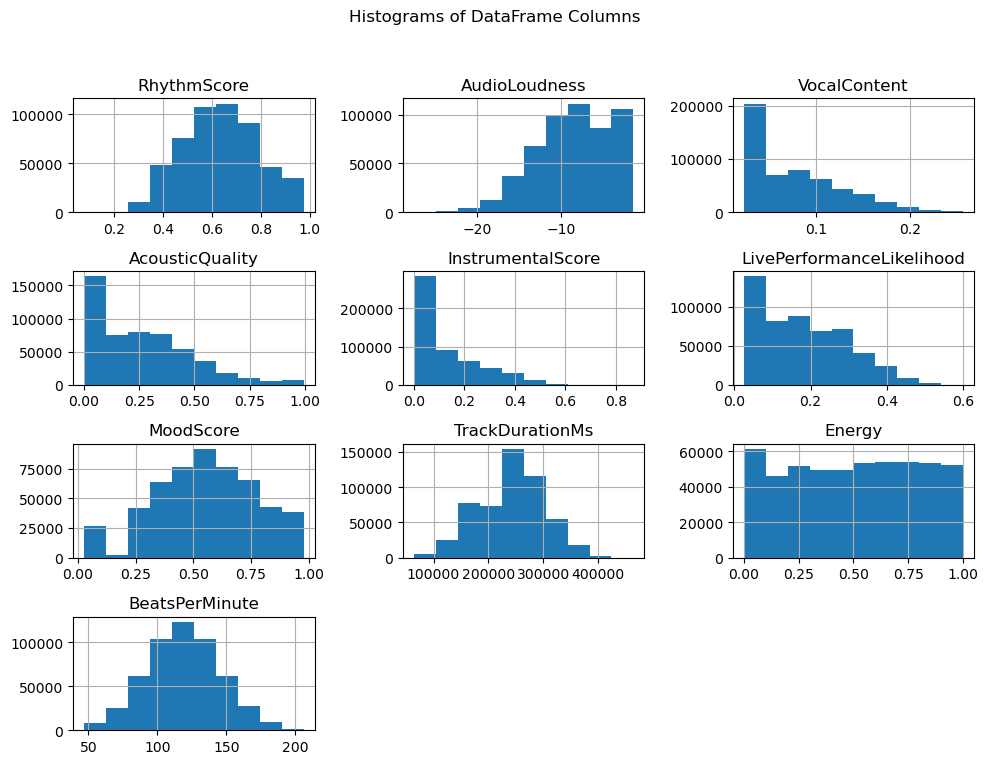

In [7]:
df.hist(figsize=(10, 8), bins=10) 
plt.suptitle('Histograms of DataFrame Columns') 
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

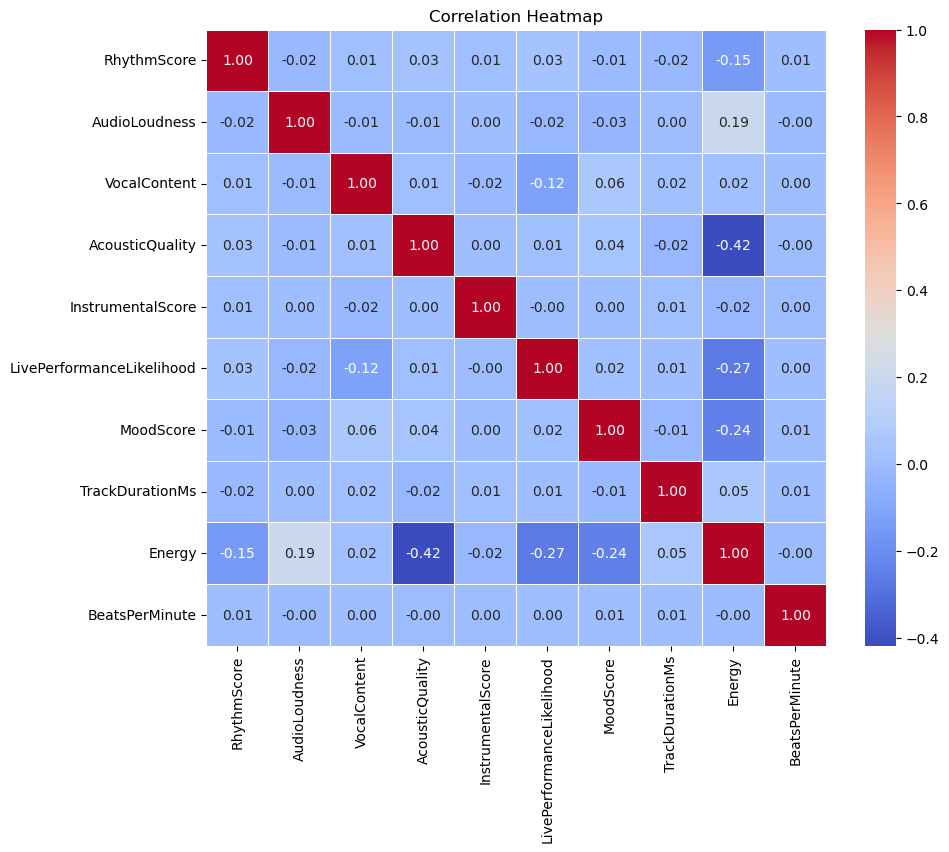

In [8]:
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
df.drop("BeatsPerMinute", axis=1).apply(lambda x: x.corr(df.BeatsPerMinute))

RhythmScore                  0.005440
AudioLoudness               -0.003327
VocalContent                 0.004876
AcousticQuality             -0.000820
InstrumentalScore            0.001900
LivePerformanceLikelihood    0.003471
MoodScore                    0.007059
TrackDurationMs              0.006637
Energy                      -0.004375
dtype: float64

In [39]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor


In [13]:
X = df.drop("BeatsPerMinute", axis=1)
y = df["BeatsPerMinute"]


In [43]:
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={
    'n_estimators': [100,500,10],
    'max_depth': [3, 18],
    'learning_rate': [0.01, 0.3],
    'subsample': [0.5, 1.0],
    'colsample_bytree': [0.5, 1.0],
    # 'reg_alpha': [40, 180],
    # 'reg_lambda': [0, 1],
    # 'min_child_weight': [0, 10],
    # 'gamma': [1, 9],
    # 'seed': 0
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,)

xgb = XGBRegressor()

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=space,
    n_iter=5,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=4,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


KeyboardInterrupt: 

In [15]:
model = XGBRegressor()
scores = cross_val_score(model, X, y, cv=5,scoring='neg_mean_squared_error') # cv=5 for 5-fold cross-validation
scores = [np.sqrt(-x) for x in scores]
print("Cross-validation scores:", scores)
print("Mean accuracy:", sum(scores)/len(scores))

Cross-validation scores: [np.float64(26.5509013562072), np.float64(26.650266163169704), np.float64(26.5155559607758), np.float64(26.541209305008675), np.float64(26.57243470744172)]
Mean accuracy: 26.56607349852062
